# K means clustering

## data prep

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [96]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:,3:].values

In [97]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [98]:
type(x)

numpy.ndarray

## using elbow method to find the optimal number of clusters

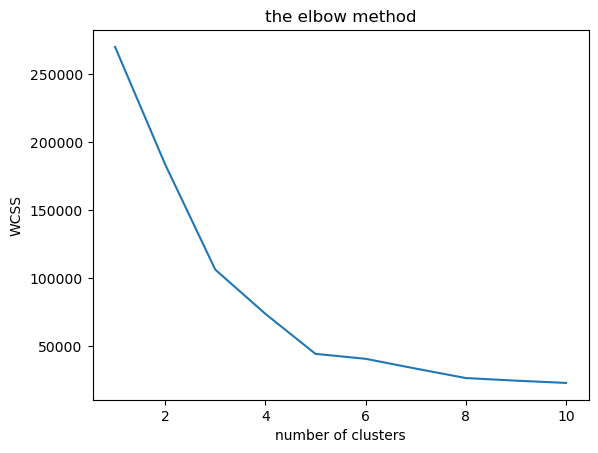

In [100]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11) :
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

using elbow method , we have that the optimum number of cluster is 5

## training the k-means model on the dataset

In [103]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x)

## visualising the cluster

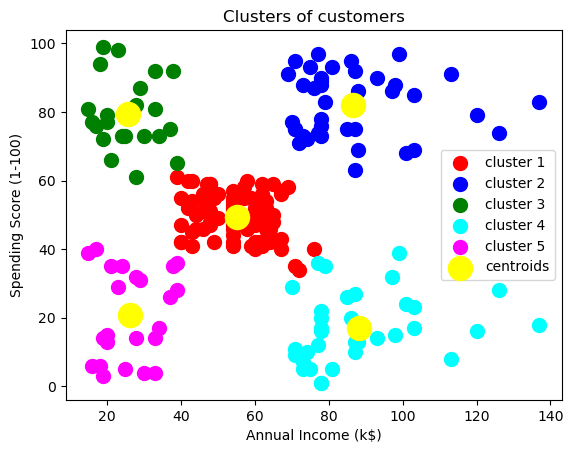

In [105]:
plt.scatter(x[y_kmeans== 0,0],x[y_kmeans== 0,1],s=100,c='red',label = 'cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label = 'cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label = 'cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label = 'cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s= 300,c = 'yellow',label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

---

## personal notes

### what is the intuition of k-means clustering 
The intuition behind K-Means clustering revolves around the idea of partitioning data into distinct groups (or clusters) where each group contains data points that are similar to each other. The key goal is to minimize the distance between the data points within the same cluster while maximizing the distance between different clusters.

### what is 'the elbow method' and WCSS ?
 
# Within-Cluster Sum of Squares (WCSS)
WCSS is a metric used to measure the total variation within a single cluster. Specifically, WCSS calculates the sum of squared distances between each data point in a cluster and the centroid (center) of that cluster. The smaller the WCSS value, the closer the data points are to their centroid, indicating a more compact clust \i \).

### The Elbow Method
The Elbow Method is a technique used to find the optimal number of clusters by using the WCSS values calculated for various values of K. This method works by plotting the WCSS values against the number of clusters K, and then selecting the K value where the decrease in WCSS starts to slow down significantly, forming an "elbow" shap results more meaningful and relevant.